In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from micrograd_clone.engine import Value
from micrograd_clone.nn import Neuron, MultilayerPerceptron

In [2]:
# load data
data = np.loadtxt('data/data.csv', delimiter=',', skiprows=1)

# split data into features and labels
X = data[:, :2]
y = data[:, 2]

X = X.astype(np.float32)
y = y.astype(np.float32)

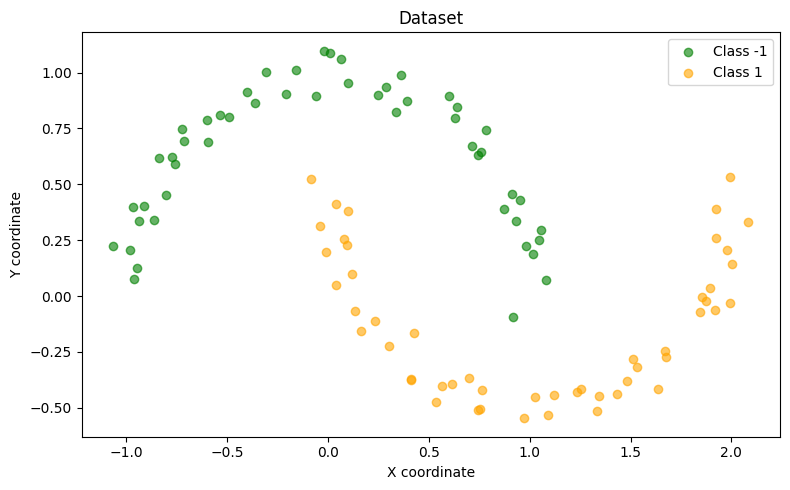

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='green', label='Class -1', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='orange', label='Class 1', alpha=0.6)

plt.title('Dataset')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
def train(model, n_epochs = 75, learning_rate = 0.1, batch_size = 25):
    loss = []
    for epoch in range(n_epochs):
        epoch_loss = 0.0

        # create mini-batches
        indices = list(range(len(X)))
        random.shuffle(indices)

        for i in range(0, len(X), batch_size):
            batch_indices = indices[i : i + batch_size]
            batch_loss = Value(0.0)

            # zero gradients
            model.zero_grad()

            for index in batch_indices:
                prediction = model(X[index])
                batch_loss += (prediction - y[index])**2 # MSE loss for easier backprop :D

            batch_loss *= (1 / batch_size)
            batch_loss.backward()

            # calculate epoch loss
            epoch_loss += batch_loss.data * batch_size

            # update model parameters
            for parameter in model.parameters():
                parameter.data -= learning_rate * parameter.grad

        epoch_loss /= len(X)
        loss.append(epoch_loss)

    return loss


def plot_decision_boundary(axes, model, features, targets):
    x_min, x_max = features[:, 0].min() - 0.5, features[:, 0].max() + 0.5
    y_min, y_max = features[:, 1].min() - 0.5, features[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    zz = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            x_input = [xx[i, j], yy[i, j]]
            zz[i, j] = 1 / (1 + np.exp(-model(x_input).data)) # turn it into probability

    axes.contourf(xx, yy, zz, alpha=0.3, cmap='RdBu')
    axes.contour(xx, yy, zz, [0.5], colors='black', linestyles='--')

    # plot data points
    axes.scatter(features[targets == -1][:, 0], features[targets == -1][:, 1], c='green', label='Class -1', alpha=0.7)
    axes.scatter(features[targets == 1][:, 0], features[targets == 1][:, 1], c='orange', label='Class 1', alpha=0.7)

    axes.set_title('Decision Boundary')
    axes.legend()


def plot_loss(axes, loss_over_time):
    axes.plot(list(range(len(loss_over_time))), loss_over_time)
    axes.set_title('Learning Curve')
    axes.set_xlabel('Epochs')
    axes.set_ylabel('Loss')

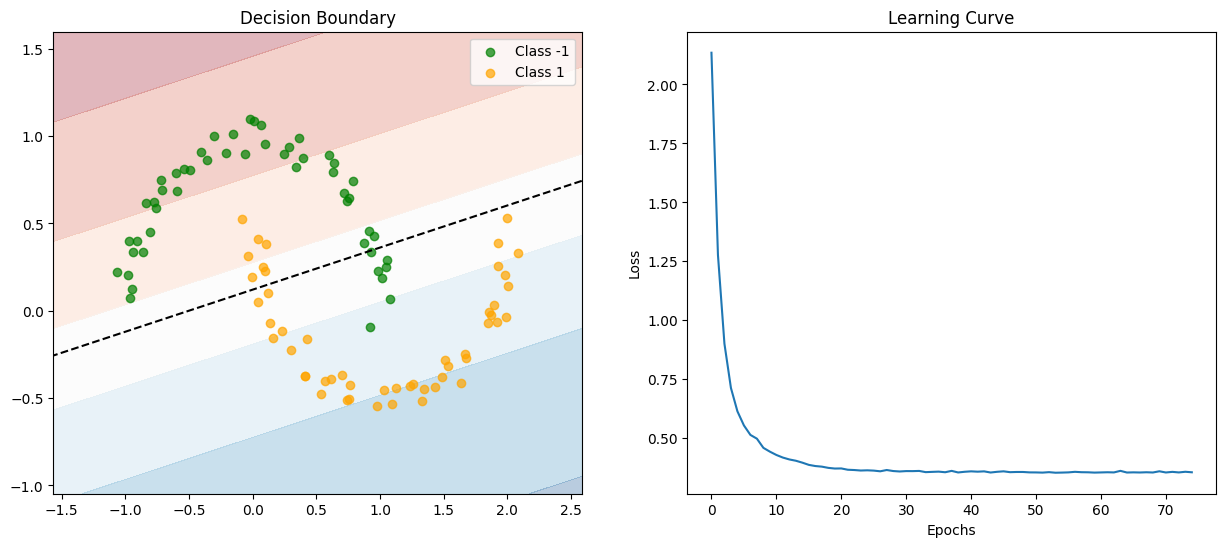

In [5]:
model = Neuron(n_inputs=2, nonlinearity=False)
loss = train(model, learning_rate=0.07)

fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(15, 6))

plot_decision_boundary(axes1, model, X, y)
plot_loss(axes2, loss)

In [ ]:
model = MultilayerPerceptron(n_inputs=2, layers=[16, 8, 2, 1])
loss = train(model, learning_rate=0.07, n_epochs=100)

fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(15, 6))

plot_decision_boundary(axes1, model, X, y)
plot_loss(axes2, loss)